Import

In [1]:
!git clone https://github.com/AndreasHammerKU/CardiacCTAnalysis.git
%cd CardiacCTAnalysis

Cloning into 'CardiacCTAnalysis'...
remote: Enumerating objects: 344, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 344 (delta 60), reused 73 (delta 40), pack-reused 223 (from 1)
Receiving objects: 100% (344/344), 2.23 MiB | 21.94 MiB/s, done.
Resolving deltas: 100% (186/186), done.
/content/CardiacCTAnalysis


Imports from Github Repository

In [3]:
!pip install dash
import numpy as np

# Custom Imports
import utils.io_utils as io
import utils.logger as logs
from baseline.BaseEnvironment import MedicalImageEnvironment
from utils.io_utils import DataLoader
from baseline.BaseAgent import DQNAgent
from utils.parser import Experiment

# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

dataset_folder = '/content/drive/MyDrive/Data'

Mounted at /content/drive


Hyperparameters

In [10]:
MAX_STEPS = 500
EPISODES = 100
IMAGE_INTERVAL = 2
AGENTS = 6
N_SAMPLE_POINTS = 5
EVALUATION_STEPS = 30
EVALUATION_INTERVAL = 10
DECAY = 150 # EPSILON = MIN_EPS - (MAX_EPS - MIN_EPS) * e^(-1 * current_step / decay)
MODEL_TYPE="Network3D"
ATTENTION=False
EXPERIMENT=Experiment.SHARE_PAIRWISE

In [11]:
debug = False

# Colab not enough RAM
preload_images = False
logger = logs.setup_logger(debug)

dataLoader = DataLoader(dataset_folder)

Training

In [12]:
# Initialize training environment
train_env = MedicalImageEnvironment(logger=logger,
                              dataLoader=dataLoader,
                              image_list=['n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14', 'n15', 'n16', 'n17', 'n18', 'n19', 'n20', 'n21', 'n22', 'n23', 'n24', 'n25', 'n26', 'n27', 'n28', 'n29', 'n30'],
                              agents=AGENTS,
                              n_sample_points=N_SAMPLE_POINTS,
                              preload_images=preload_images)
eval_env = MedicalImageEnvironment(logger=logger,
                              task="eval",
                              dataLoader=dataLoader,
                              image_list=['n31', 'n32', 'n33', 'n34', 'n35', 'n36', 'n37', 'n38', 'n39', 'n40'],
                              agents=AGENTS,
                              n_sample_points=N_SAMPLE_POINTS)
agent = DQNAgent(train_environment=train_env,
                 eval_environment=eval_env,
                 task="train",
                 logger=logger,
                 state_dim=train_env.state_size,
                 action_dim=train_env.n_actions,
                 attention=ATTENTION,
                 model_type=MODEL_TYPE,
                 agents=AGENTS,
                 max_steps=MAX_STEPS,
                 episodes=EPISODES,
                 decay=DECAY,
                 image_interval=IMAGE_INTERVAL,
                 evaluation_steps=EVALUATION_STEPS,
                 evaluation_interval=EVALUATION_INTERVAL,
                 experiment=EXPERIMENT)

agent.train_dqn()

INFO:Logger:Episode 1: Total Reward = -58.40 | Final Avg Distance 91.79 | Distances in mm [20.46 14.66 12.25  9.99 18.19 12.9 ] | Avg Closest Point = 21.13 | Avg Furthest Point = 93.61
INFO:Logger:Episode 2: Total Reward = -91.63 | Final Avg Distance 125.02 | Distances in mm [18.67  5.46 30.48 26.09 22.34 18.34] | Avg Closest Point = 22.19 | Avg Furthest Point = 130.09
INFO:Logger:Episode 3: Total Reward = -72.53 | Final Avg Distance 95.99 | Distances in mm [12.25 24.12 22.36  6.47 15.97 10.86] | Avg Closest Point = 15.74 | Avg Furthest Point = 99.22
INFO:Logger:Episode 4: Total Reward = -28.52 | Final Avg Distance 51.98 | Distances in mm [ 2.96 21.12 10.62 12.1   9.16  1.53] | Avg Closest Point = 8.27 | Avg Furthest Point = 80.59
INFO:Logger:Episode 5: Total Reward = 4.16 | Final Avg Distance 29.80 | Distances in mm [13.33  1.87  1.34 10.53  6.43  2.54] | Avg Closest Point = 8.72 | Avg Furthest Point = 44.87
INFO:Logger:Episode 6: Total Reward = 17.61 | Final Avg Distance 16.35 | Dist

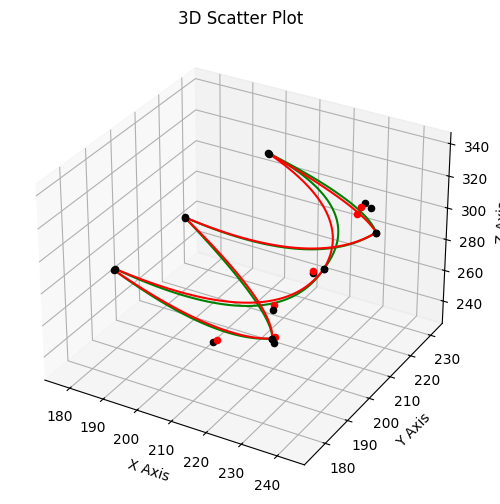

In [13]:
train_env.visualize_current_state()

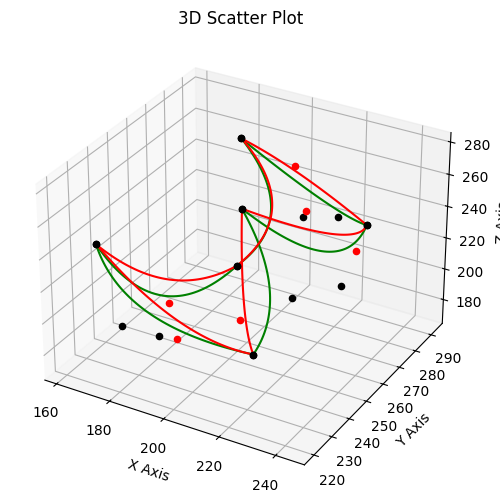

In [14]:
eval_env.visualize_current_state()

Evaluate

In [16]:
test_env = MedicalImageEnvironment(logger=logger,
                              task="test",
                              dataLoader=dataLoader,
                              image_list=['n41', 'n42', 'n43', 'n44', 'n45', 'n46', 'n47', 'n48', 'n49', 'n50'],
                              agents=AGENTS,
                              n_sample_points=N_SAMPLE_POINTS)
agent = DQNAgent(train_environment=train_env,
                 eval_environment=eval_env,
                 test_environment=test_env,
                 task="test",
                 logger=logger,
                 state_dim=test_env.state_size,
                 action_dim=test_env.n_actions,
                 attention=ATTENTION,
                 agents=AGENTS,
                 model_path=f"latest-model-{MODEL_TYPE}-{EXPERIMENT.name}.pt",
                 model_type=MODEL_TYPE,
                 max_steps=MAX_STEPS,
                 episodes=EPISODES,
                 evaluation_steps=25,
                 experiment=EXPERIMENT
                 )

agent.test_dqn()

INFO:Logger:Evaluation Episode 1: Total Reward = 8.28 | Final Average Distance = 15.05 | Error in mm [2.05 3.12 1.61 1.73 4.74 3.25] | Closest Point = [12.21 16.4   7.55  8.25 21.77 17.46] | Furthest Point = [24.08 20.64 17.83 25.32 25.5  24.17]
INFO:Logger:Evaluation Episode 2: Total Reward = 8.13 | Final Average Distance = 14.62 | Error in mm [3.69 0.89 4.6  4.12 1.91 1.78] | Closest Point = [11.4   5.39 22.23 15.56 11.45  9.06] | Furthest Point = [20.27 25.57 26.87 21.61 26.04 22.87]
INFO:Logger:Evaluation Episode 3: Total Reward = 13.22 | Final Average Distance = 13.85 | Error in mm [2.12 0.7  2.78 3.49 2.09 2.8 ] | Closest Point = [11.7   3.74 17.92 19.7  12.85 15.3 ] | Furthest Point = [27.15 23.17 22.58 29.53 25.48 30.68]
INFO:Logger:Evaluation Episode 4: Total Reward = 14.85 | Final Average Distance = 17.18 | Error in mm [2.22 1.91 2.06 3.78 2.41 1.92] | Closest Point = [15.   17.06 15.56 24.41 15.78 11.05] | Furthest Point = [23.43 33.85 31.92 33.62 36.11 28.37]
INFO:Logger:Ev

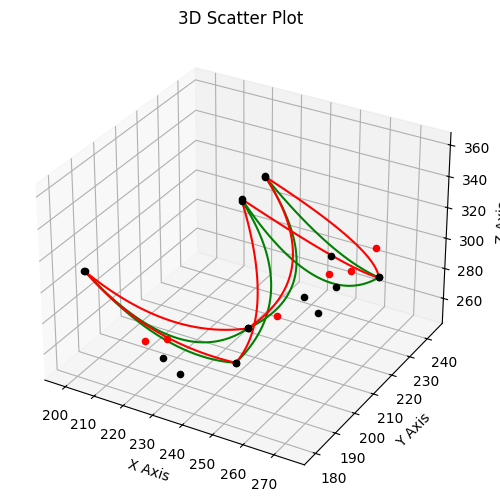

In [17]:
test_env.visualize_current_state()